In [1]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# file_name = "CR_ttb_prefit.yaml"
file_name = "CR_ttc_prefit.yaml"

In [3]:
with open(file_name, "r") as stream:
    dictionary = yaml.full_load(stream)

    # convert dictionaries into dfs
    samples_df = pd.DataFrame(dictionary['Samples'])
    total_df = pd.DataFrame(dictionary['Total']).T
    data_df = pd.DataFrame(dictionary['Data']).T
    figure_df = pd.DataFrame(dictionary['Figure']).T

    samples_df.set_index('Name', inplace=True)
    # set column name of total_df and data_df to 'Yield' to match samples_df
    total_df.rename(columns={0:'Yield'}, inplace=True)
    data_df.rename(columns={0:'Yield'}, inplace=True)

    # merge them with multi-indexing
    result = pd.concat([samples_df, total_df, data_df], keys=['Samples', 'Total', 'Data'])

In [4]:
# # at this point, rows in sum are list of 10 numbers, each corresponding
# # to a different yield -> need to split them and put them into individual columns
# temp_df = pd.DataFrame(result['Yield'].to_list(), columns=[f"Yield_{i}" for i in range(len(result.iloc[0][0]))])
# # match index of temp_df and sum to allow concat later
# temp_df.set_index(result.index, inplace=True)
# result = pd.concat([result, temp_df], axis=1).drop('Yield', axis=1)

In [5]:
result.loc[['Total']].iloc[1,0]

[827.5826665452911,
 805.426846012266,
 826.1614268385684,
 826.1363081308623,
 840.6187776963856,
 849.9563379690394,
 863.3908776550447,
 871.4519829633153,
 878.3093688851706,
 867.5428671883344]

In [6]:
figure_df

,0
BinEdges,"[0, 0.2596, 0.2928, 0.3119, 0.3279999999999999..."
XaxisLabel,BDT(t#bar{t} + #geq1c)
YaxisLabel,


In [7]:
bin_edges = figure_df.iloc[0][0]
centres = []
widths = []

for i, val in enumerate(bin_edges):
    try:
        x = val # current value
        y = bin_edges[i+1] # next value
        diff = y - x
        widths.append(diff)
        centres.append(x + 0.5*(diff))
    except:
        continue

In [8]:
widths

[0.2596,
 0.03320000000000001,
 0.019100000000000006,
 0.016099999999999948,
 0.013700000000000045,
 0.013700000000000045,
 0.014599999999999946,
 0.017199999999999993,
 0.024799999999999933,
 0.5880000000000001]

In [9]:
source = result.loc[['Samples']] # list of units to be stacked
pct_max = 99 # for example, max percentile of color ramp
pct_min = 1 # for example, min percentile of color ramp
ramp = plt.cm.plasma # for example

# number of items in data source
n = len(source)

# list of values between 0.00 and 1.00; length equals length of data source
n_prop = list(i / 100.0 for i in (np.arange(pct_min, pct_max, (pct_max-pct_min)/n)))

# create list of colors
color_list = []
for i in n_prop:
    clr = ramp(i) 
    color_list.append(clr)

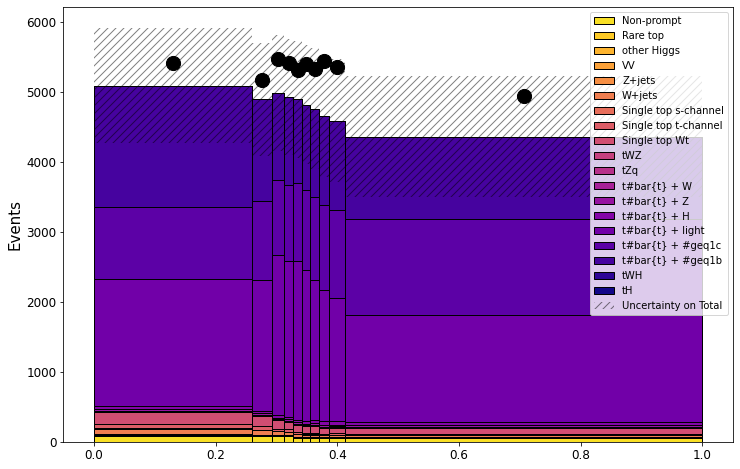

In [10]:
# nbins = 10
# result.plot.bar(stacked=True)

# ax.hist(list(range(1, len(row)+1)), len(row), weights=row)
# ax.set_title(result.index[i][0] + " " + result.index[i][1])
fig, ax = plt.subplots(figsize=(12,8))

sum_list = [0]*10
for i, row in reversed(list(enumerate(result['Yield']))):
    if result.index[i][0] == 'Samples':
        ax.bar(centres, row, width=widths, bottom=sum_list, label=result.index[i][1], edgecolor='k', color=color_list[i])
        sum_list = [sum(a) for a in zip(sum_list, row)]

ax.scatter(centres, result.loc[['Data']].iloc[0,0], color='k', s=200) # real data

total_bars = result.loc[['Total']].iloc[0,0] # heiht of all bars summed up
ax.bar(centres, result.loc[['Total']].iloc[1,0], width=widths, bottom=total_bars, fill=False, linewidth=0, alpha=0.5, hatch='///', label="Uncertainty on Total")
ax.bar(centres, result.loc[['Total']].iloc[2,0], width=widths, bottom=total_bars, fill=False, linewidth=0, alpha=0.5, hatch='///')

ax.set_ylabel("Events", fontsize=15)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.legend()